
# P2I7: Mini Projet 1 - Gaz Parfaits - Code C - Boite


## Prénom Nom - Groupe - Date :

16/03/2023 SAMAIN Luc G93 G274


## Modélisation du rebond d’une particule sur un mur

On souhaite ici appliquer le modèle de rebond défini dans la section précédente afin de retrouver expérimentalement la loi des gaz parfaits à partir d'une simulation numérique simple. On va donc considérer une masse ponctuelle m contenue dans une boîte rectangulaire définie par les paramètres Xmin, Xmax, Ymin, et Ymax. La masse est munie des conditions initiales X0, Y0, Vx0, et Vy0. Le système a l'allure suivante :

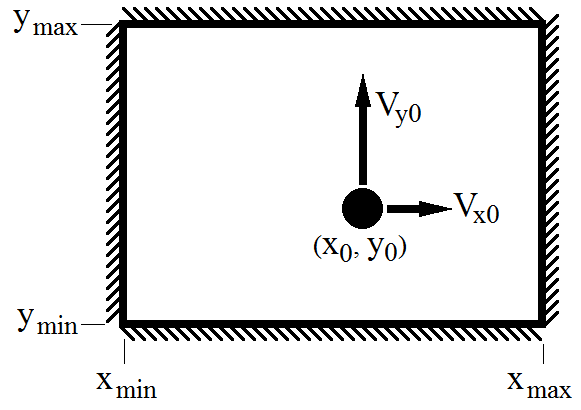

La difficulté ici est de prendre en compte les deux degrés de liberté du système. Le premier bloc de code charge les bibliothèques nécessaires :

In [1]:
#libraries à importer
%matplotlib inline 
%matplotlib inline
%matplotlib notebook
%matplotlib notebook
from matplotlib import pyplot as plt        #librairie d'affichage
import numpy as np
from matplotlib import animation
from matplotlib.patches import Rectangle

## Etape 1

Reprendre le script utilisé dans l'étapes 1 du notebook "Rebond". Compléter la déclaration de variables avec les nouvelles données (taille de la boite, etc.). Initialiser les listes nécessaires pour stocker les positions et vitesses selon y, et injecter les conditions initiales. Initialiser également des listes pour les forces Fx et Fy, car il sera nécessaire de les stocker au cours de la simulation.

In [2]:
t0 = 0 # (s)
tf = 10 # (s)
dt = 1e-6 # pas de temps
#on a dt=(tf - t0)/N ==> N = (tf - t0)/dt
N = int((tf - t0)/dt)

Vx0 = -0.5 #m.s-1 
Vy0 = -0.3 #m.s-1 
X0 = 0.20 # 10cm 
Y0 = 0.10 # 20cm 

#une boite de 50cm x 50cm: 
Xmin = 0.0
Xmax = 0.5
Ymin = 0.0
Ymax = 0.5

m = 0.01 #masse en kg de 10g 
k = 1e4 #raideur en N.m-1

#matrice position, vitesse, temps et forces:
T =  np.zeros(N+1)
X = np.zeros(N+1) + X0 #tout à X0 le reste sera remplacer au fur et à mesure de la simulation
Y = np.zeros(N+1) + Y0
Vx = np.zeros(N+1) + Vx0 
Vy = np.zeros(N+1) + Vy0
Fx = np.zeros(N+1) #matrices des efforts respectivement horizontaux et verticaux
Fy =  np.zeros(N+1) 

#Energie potentielle
Ep_x = np.zeros(N+1)
Ep_y = np.zeros(N+1)

Solver = input("Entrer 'euler explicite' ou 'verlet modifié'")

Entrer 'euler explicite' ou 'verlet modifié'verlet modifié


## Etape 2

En entrée de boucle, calculer et stocker les efforts horizontaux et verticaux subis par la masse ponctuelle à l'instant donné. Ceux-ci sont non-nuls seulement si elle sort des limites de la boîte. Implémenter ensuite les schémas d'Euler explicite et de Verlet pour le degré de liberté vertical, en addition du degré horizontal déjà codé dans les parties précédentes.

In [3]:
if Solver == "euler explicite":
    for i in range(1, N+1):
        #Calcul des efforts et des énergies potentielles:
        if X[i-1] < Xmin:
            Fx[i] = -k * (X[i-1]-Xmin)
            Ep_x[i] = 0.5 * k * (X[i-1]-Xmin)**2
        elif X[i-1] > Xmax:
            Fx[i] = -k * (X[i-1]-Xmax)
            Ep_x[i] = 0.5 * k * (X[i-1]-Xmax)**2
        if Y[i-1] < Ymin:
            Fy[i] = -k * (Y[i-1]-Ymin)
            Ep_y[i] = 0.5 * k * (Y[i-1]-Ymin)**2 
        elif Y[i-1] > Ymax:
            Fy[i] = -k * (Y[i-1]-Ymax)
            Ep_y[i] = 0.5 * k * (Y[i-1]-Ymax)**2 
        
        #Mise a jour des positions:
        X[i] = X[i-1] + Vx[i-1]*dt
        Y[i] = Y[i-1] + Vy[i-1]*dt
        
        #Mise à jour temps&vitesses
        T[i] = i * dt #temps 0 = 0, temps 1 = dt, temps 2 = 2dt
        Vx[i] = Vx[i-1] + (Fx[i]/m)*dt # ΣF = m *dv/dt ==> dv/dt = ΣF / m #on néglige le poids...
        Vy[i] = Vy[i-1] + (Fy[i]/m)*dt
        
elif Solver == "verlet modifié":
    for i in range(1, N+1):
        #Calcul des efforts et des énergies potentielles:
        if X[i-1] < Xmin:
            Fx[i] = -k * (X[i-1]-Xmin)
            Ep_x[i] = 0.5 * k * (X[i-1]-Xmin)**2
        elif X[i-1] > Xmax:
            Fx[i] = -k * (X[i-1]-Xmax)
            Ep_x[i] = 0.5 * k * (X[i-1]-Xmax)**2
        if Y[i-1] < Ymin:
            Fy[i] = -k * (Y[i-1]-Ymin)
            Ep_y[i] = 0.5 * k * (Y[i-1]-Ymin)**2 
        elif Y[i-1] > Ymax:
            Fy[i] = -k * (Y[i-1]-Ymax)
            Ep_y[i] = 0.5 * k * (Y[i-1]-Ymax)**2 

        
        #Mise à jour temps&vitesses    
        T[i] = i * dt #temps 0 = 0, temps 1 = dt, temps 2 = 2dt
        Vx[i] = Vx[i-1] + (Fx[i]/m)*dt # ΣF = m *dv/dt ==> dv/dt = ΣF / m #on néglige le poids...
        Vy[i] = Vy[i-1] + (Fy[i]/m)*dt
        
        #Mise a jour des positions:
        X[i] = X[i-1] + Vx[i]*dt
        Y[i] = Y[i-1] + Vy[i]*dt 

## Etape 3

Après la sortie de boucle, à partir des évolutions temporelles de Vx, Vy, X et Y, calculer les énergies cinétiques (selon les deux axes), potentielles de contact (selon les deux axes), et totale. Attention, lorsque la masse n'est pas en contact avec un mur, l'énergie potentielle est nulle (car le ressort fictif n'existe pas) !

In [4]:
#Energie cinétique
Ec_x = 0.5 * m * Vx**2
Ec_y = 0.5 * m * Vy**2

#Energie potentielle
#Voir avant!

Ec = Ec_x + Ec_y
Ep = Ep_x + Ep_y
Et = Ec + Ep

## Etape 4

Sorties graphiques : Tracer les variables X et Vx en fonction du temps, puis les variables Y et Vy.

<IPython.core.display.Javascript object>


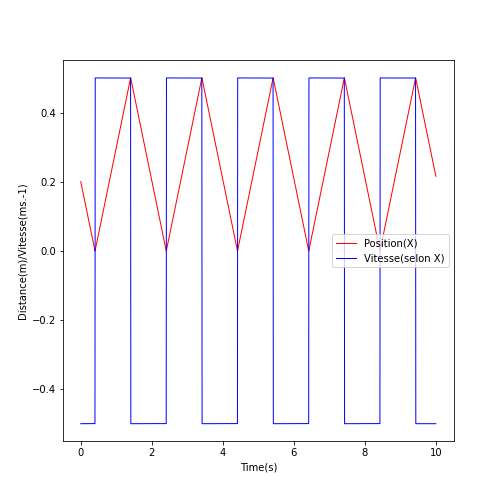

<IPython.core.display.Javascript object>


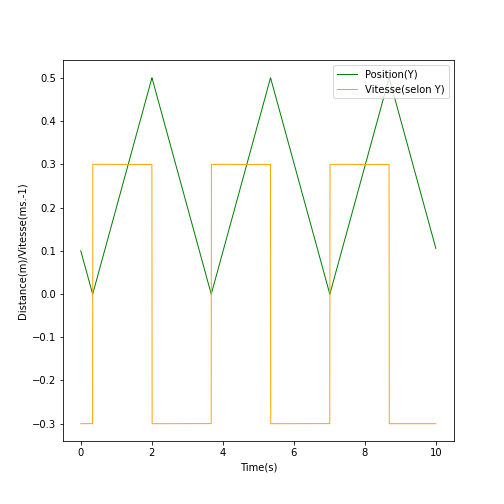

In [5]:
fig1, ax1 = plt.subplots(1, 1, figsize=(7, 7))
ax1.set_xlabel('Time(s)')
ax1.set_ylabel('Distance(m)/Vitesse(ms.-1)')
ax1.plot(T, X, color='red', lw=1, label='Position(X)')
ax1.plot(T, Vx, color='blue', lw=1, label='Vitesse(selon X)')

plt.legend()

fig2, ax2 = plt.subplots(1, 1, figsize=(7, 7))
ax2.set_xlabel('Time(s)')
ax2.set_ylabel('Distance(m)/Vitesse(ms.-1)')
ax2.plot(T, Y, color='green', lw=1, label='Position(Y)')
ax2.plot(T, Vy, color='orange', lw=1, label='Vitesse(selon Y)')

plt.legend()


## Etape 5

Sorties graphiques : Tracer la trajectoire (X,Y) de la particule ainsi que les murs de la boîte. 

<IPython.core.display.Javascript object>


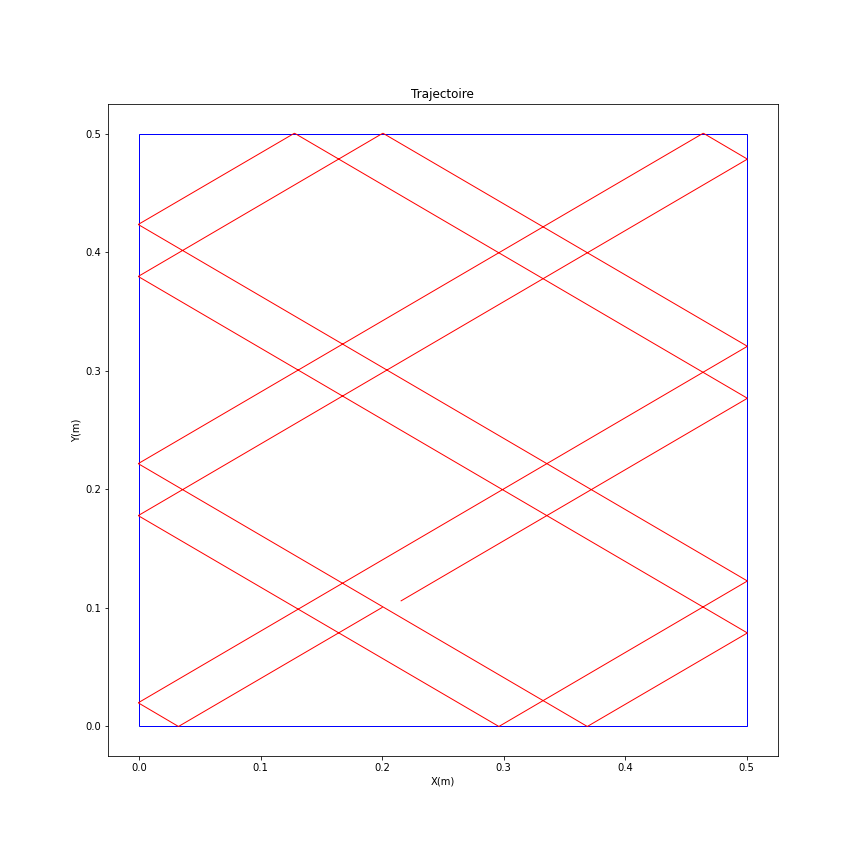

In [6]:
fig, ax1 = plt.subplots(figsize=(12, 12))
ax1.set_xlabel('X(m)')
ax1.set_ylabel('Y(m)')
ax1.plot(X, Y, color='red', lw=1)
ax1.set_title("Trajectoire")
border = Rectangle((Xmin, Ymin), Xmax, Ymax, linewidth=1, edgecolor='b', facecolor='none')
ax1.add_patch(border)

## Etape 6

Sorties graphiques : Tracer les énergies cinétique, potentielle et totale en fonction du temps. 

<IPython.core.display.Javascript object>


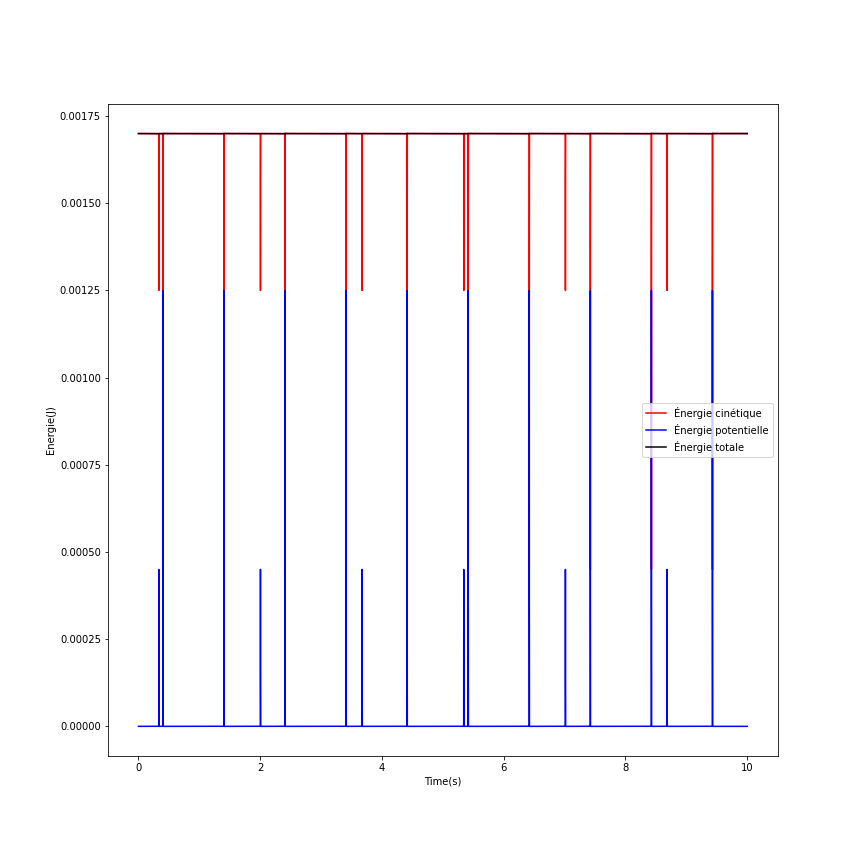

In [7]:
fig, ax2 = plt.subplots(figsize=(12,12))
ax2.set_xlabel('Time(s)')
ax2.set_ylabel('Energie(J)')
ax2.plot(T, Ec, color='red', lw=1.5, label='Énergie cinétique')
ax2.plot(T, Ep, color='blue', lw=1.5, label='Énergie potentielle')
ax2.plot(T, Et, color='black', lw=1.5, label='Énergie totale', linestyle='-')
plt.legend()

## Etape 7

A partir des données de la simulation, calculer les scalaires Pression et Température moyennés sur la durée de la simulation. Calculer également le volume V de la boite. Il faut noter qu'on est dans un cas adimensionnel, et en 2D, et qu'on n'utilisera donc pas la constante de Boltzmann. Les formules pour calculer le volume, la pression et la température sont donc les suivantes :

$Volume=(Xmax-Xmin)*(Ymax-Ymin)$

Il s'agit d'un volume "2D" (c'est-à-dire d'une surface), et on postule une dimension unitaire dans la troisième direction.

$Pression=(F_xmoy+F_ymoy)/(2*(Xmax-Xmin)+2*(Ymax-Ymin))$

Où $F_xmoy$ et $F_ymoy$ sont les moyennes temporelles des valeurs absolues des efforts appliqués sur les murs verticaux et horizontaux.

$T=E_cmoy$

Où $E_cmoy$ est la moyenne temporelle de l'énergie cinétique totale du système.

Calculer ensuite le rapport $PV/T$. Afficher tous ces résultats, en vous assurant bien que la simulation est assez longue et ontient suffisamment de rebonds pour que ces grandeurs statistiques aient un sens. Vous devriez obtenir une valeur proche de 1.

In [8]:
#Volume
volume = (Xmax - Xmin) * (Ymax - Ymin)

#Pression
Fx_moy = np.mean(abs(Fx))
Fy_moy = np.mean(abs(Fy))
pression = (Fx_moy + Fy_moy)/(2*(Xmax-Xmin)+2*(Ymax-Ymin))

#Temperature:
temperature = np.mean(Ec)
print(pression*volume/temperature)

1.0014062999597229


## Etape 8

Faîtes varier certaines grandeurs du problème (taille de la boite, durée, conditions initiales, etc.) et observez le résultat. Commentez vos observations.

## Réponse :

#### Vitesse initiale, pas de temps important ==> Mauvaise gestion des rebonds la particule tend à sortir de la boite
#### Pas de temps important ==> comme pour MP1_B énergie totale ne reste pas constante sur les transitions des rebonds.
#### 50cm x 50cm -> 1m x 1m ==> Aucun changement significatif, simplement proportionnalité dansl les valeurs positions.
#### 1m x 1m -> 2m x 1m ==> Même remarque que précédemment
#### raideur importante ==> permet d'avoir un rebond plus aigu, mais saut de l'énergie totale aux impacts...
#### si raideur importante et pas assez petit pas ==> aberration sorti de la boite (tester raideur 100000000 et dt = 1e-3 donne des aberrations alors qu'avec 1e-5 aucun probleme)

<IPython.core.display.Javascript object>


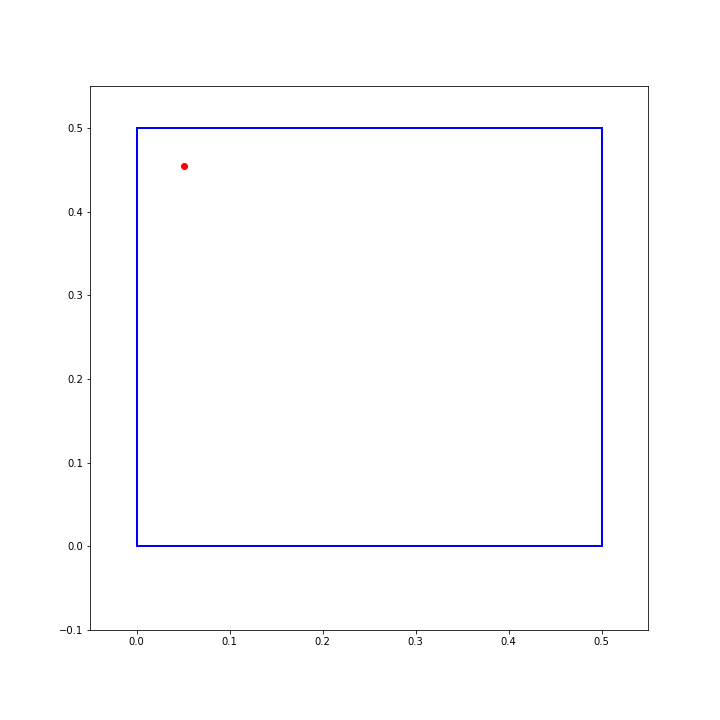

In [9]:
#Moi animation:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(xlim=(-0.05, Xmax+0.05), ylim=(-0.1, Ymax+0.05))

particule, = ax.plot([],[],'ro') 

#On accelere le baille:
coeff_acceleration = 1000
X_new = np.zeros(N+1//coeff_acceleration +1)
Y_new = np.zeros(N+1//coeff_acceleration +1)

j = 0
for i in range(N+1):
    if i%coeff_acceleration == 0:
        X_new[j] = X[i]
        Y_new[j] = Y[i]
        j+=1

X_new[-1] = X[-1]
Y_new[-1] = Y[-1]
        
# fonction pour l'animation 
def anim_pendule(i):
    particule.set_data([X_new[i],Y_new[i]])
    return particule


# Ajout d'un rectangle pour dessiner les bordures
border = Rectangle((0, 0), Xmax, Ymax, linewidth=2, edgecolor='b', facecolor='none')
ax.add_patch(border)


anim = animation.FuncAnimation(
    fig, anim_pendule, frames=N+1//coeff_acceleration +1, interval=10, blit=False)
plt.show()

In [10]:
print(Ep[-1])

0.0017000001249265536
